In [17]:
#  Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load Dataset California Housing
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names  # Nama fitur


In [19]:
# Mengonversi data fitur dan target menjadi DataFrame
df_X = pd.DataFrame(X, columns=california.feature_names)
df_y = pd.Series(y, name='target')
df_X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [20]:
df_y

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [21]:
# Gabungkan fitur dan target dalam satu DataFrame
df = pd.concat([df_X, df_y], axis=1)

df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [22]:
from sklearn.model_selection import train_test_split
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
# Normalisasi Data (StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Definisi & Training Model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi dengan Model
y_pred = rf_model.predict(X_test)

# Evaluasi Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f" **Evaluasi Model Random Forest** ")
print(f" Mean Squared Error (MSE)  : {mse:.4f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f" R² Score: {r2:.4f}")

 **Evaluasi Model Random Forest** 
 Mean Squared Error (MSE)  : 0.2552
 Root Mean Squared Error (RMSE): 0.5051
 R² Score: 0.8053


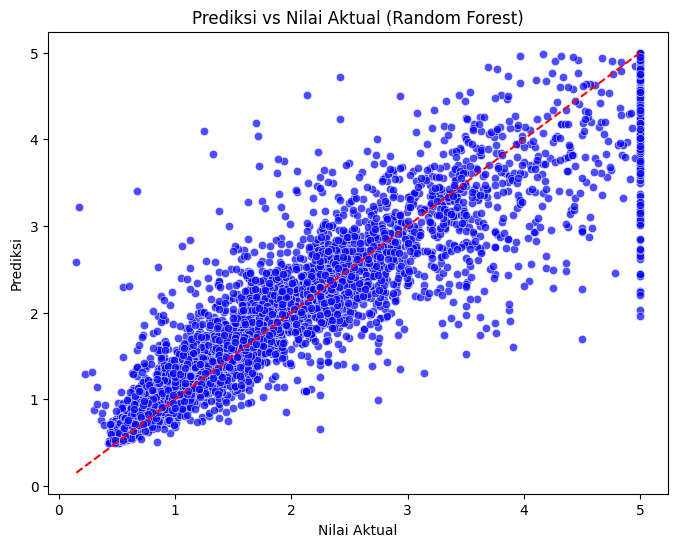

In [25]:
# Visualisasi: Scatter Plot Prediksi vs Aktual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis ideal
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.title("Prediksi vs Nilai Aktual (Random Forest)")
plt.show()

<ipython-input-26-963e6dd806c6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")


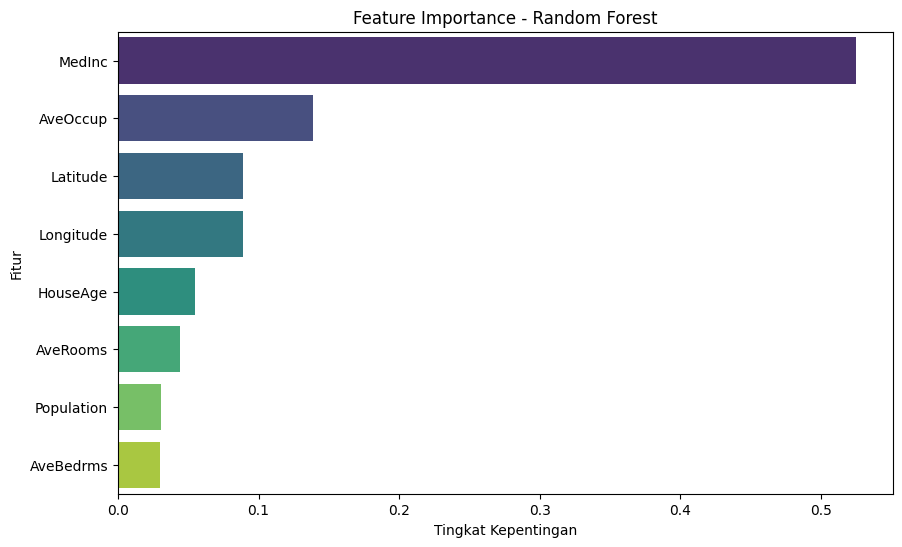

In [26]:
# Visualisasi: Feature Importance
feature_importance = rf_model.feature_importances_
feature_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.title("Feature Importance - Random Forest")
plt.show()